In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from layer import layer
from network import neural_network
from sklearn.model_selection import train_test_split
import Optimizers
import loss_funcs as losses


In [2]:
# load the data
def load_data():
    with open('data/heart.csv') as file:
        reader = csv.reader(file)
        headers = next(reader)
        data = np.array(list(reader) , dtype= np.float64)
# seperate input and labels
# last column is the labels
    Y = data[:,-1]
    # remove labels from data
    X = data[:,:-1]
    # normalize the data
    # i will be dividing each value with the max value in the column
    X = X / X.max(axis=0)
    return headers,X,Y


In [3]:
# split data into train and test 
headers, X , Y = load_data()
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# reshape lables arrays
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [4]:
# define M and N for training samples
M = x_train.shape[0]
N = x_train.shape[1]

In [5]:
# create a model
model = neural_network()

# compile model
model.compile(
    optimizer=Optimizers.MiniBatchGradientDescent(),
    Cost=losses.BinaryCrossEntropy()
)

# create the layers of the model
model.sequential(
    [
        layer(N,10,"relu"),
        layer(10,1,"sigmoid")
    ]
)

In [6]:
# train the model
model, costs = model.fit(x_train,y_train,0.0001,10000)

0 cost : 0.9470935552430088 accuracy : 50.41%
1000 cost : 0.446643450673725 accuracy : 82.64%
2000 cost : 0.40222257243010157 accuracy : 82.23%
3000 cost : 0.38973169905654836 accuracy : 83.88%
4000 cost : 0.39952099441100836 accuracy : 81.82%
5000 cost : 0.3834883464205196 accuracy : 83.88%
6000 cost : 0.3742621790059244 accuracy : 83.88%
7000 cost : 0.3682720553278986 accuracy : 82.64%
8000 cost : 0.36324900985650205 accuracy : 82.64%
9000 cost : 0.3587488098117796 accuracy : 83.06%


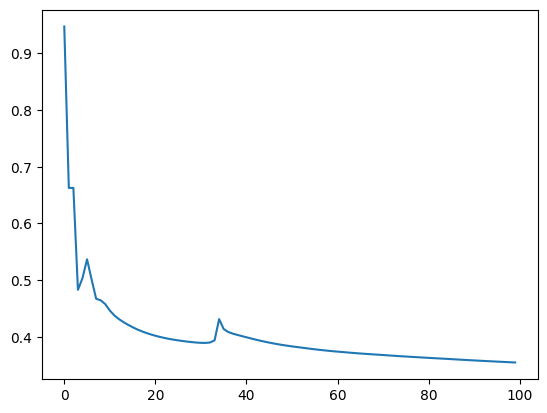

In [7]:
plt.plot(costs)

In [8]:
accuracy = ((x_test.shape[0] - np.sum((model.predict(x_test) != y_test).astype(int))) / x_test.shape[0] ) * 100

In [9]:
accuracy

88.52459016393442